In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing the necessary libraries
import torch
import pandas as pd
import re
import matplotlib.pyplot as plt

from torch.utils.data import TensorDataset

from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
!pip install transformers
from transformers import BertTokenizer
from transformers import BertForSequenceClassification


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.0 MB/s eta 0:00:00


In [3]:
#importing the dataset into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Capston/mbti_12.csv')

In [4]:
#showing the first 5 rows of the dataset
df.head(10)

,types,posts,Group
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,Diplomats
1,ENTP,'I'm finding the lack of me in these posts ver...,Analysts
2,INTP,'Good one _____ https://www.youtube.com/wat...,Analysts
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",Analysts
4,ENTJ,'You're fired.|||That's another silly misconce...,Analysts
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,Analysts
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...",Diplomats
7,INTJ,'I tend to build up a collection of things on ...,Analysts
8,INFJ,"I'm not sure, that's a good question. The dist...",Diplomats
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,Analysts


In [5]:
#showing the first 5 rows of the dataset
df.head(10)

,types,posts,Group
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,Diplomats
1,ENTP,'I'm finding the lack of me in these posts ver...,Analysts
2,INTP,'Good one _____ https://www.youtube.com/wat...,Analysts
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",Analysts
4,ENTJ,'You're fired.|||That's another silly misconce...,Analysts
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,Analysts
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...",Diplomats
7,INTJ,'I tend to build up a collection of things on ...,Analysts
8,INFJ,"I'm not sure, that's a good question. The dist...",Diplomats
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,Analysts


In [6]:
#showing dataset infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4716 entries, 0 to 4715
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   types   4716 non-null   object
 1   posts   4716 non-null   object
 2   Group   4716 non-null   object
dtypes: object(3)
memory usage: 110.7+ KB


In [7]:
#showing the posts of the first user in the dataset
df.posts.values[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [8]:
# Given personality types
personality_types = [
    "INFP", "INFJ", "INTP", "INTJ", "ENTP", "ENFP",
    "ISTP", "ISFP", "ENTJ", "ISTJ", "ENFJ", "ISFJ",
    "ESTP", "ESFP", "ESFJ", "ESTJ"
]

# Personality type grouping based on 16Personalities
grouped_types = {
    "Analysts": ["INTJ", "INTP", "ENTJ", "ENTP"],
    "Diplomats": ["INFJ", "INFP", "ENFJ", "ENFP"],
    "Sentinels": ["ISTJ", "ISFJ", "ESTJ", "ESFJ"],
    "Explorers": ["ISTP", "ISFP", "ESTP", "ESFP"]
}

# Group the personality types
grouped_personalities = {}
for group, types in grouped_types.items():
    grouped_personalities[group] = [p for p in personality_types if p in types]

# Print the grouped personality types
for group, types in grouped_personalities.items():
    print(f"{group}: {', '.join(types)}")


Analysts: INTP, INTJ, ENTP, ENTJ
Diplomats: INFP, INFJ, ENFP, ENFJ
Sentinels: ISTJ, ISFJ, ESFJ, ESTJ
Explorers: ISTP, ISFP, ESTP, ESFP


In [9]:
import pandas as pd

# Create a DataFrame from the original CSV file
df = pd.read_csv('/content/drive/MyDrive/Capston/mbti_12.csv')  # Replace with the path to your original CSV file

# Given personality types
personality_types = [
    "INFP", "INFJ", "INTP", "INTJ", "ENTP", "ENFP",
    "ISTP", "ISFP", "ENTJ", "ISTJ", "ENFJ", "ISFJ",
    "ESTP", "ESFP", "ESFJ", "ESTJ"
]

# Personality type grouping based on 16Personalities
grouped_types = {
    "Analysts": ["INTJ", "INTP", "ENTJ", "ENTP"],
    "Diplomats": ["INFJ", "INFP", "ENFJ", "ENFP"],
    "Sentinels": ["ISTJ", "ISFJ", "ESTJ", "ESFJ"],
    "Explorers": ["ISTP", "ISFP", "ESTP", "ESFP"]
}

# Group the personality types
grouped_personalities = {}
for group, types in grouped_types.items():
    grouped_personalities[group] = [p for p in personality_types if p in types]

# Create a new column with the grouped personality types
df['Group'] = df['types'].apply(lambda x: next((group for group, types in grouped_types.items() if x in types), None))

# Save the DataFrame to a new CSV file
df.to_csv('/content/drive/MyDrive/Capston/mbti_12.csv', index=False)  # Replace with the desired file name


In [10]:
df = pd.read_csv('/content/drive/MyDrive/Capston/mbti_12.csv')

In [11]:
#showing the first 5 rows of the dataset
df.head(10)

,types,posts,Group
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,Diplomats
1,ENTP,'I'm finding the lack of me in these posts ver...,Analysts
2,INTP,'Good one _____ https://www.youtube.com/wat...,Analysts
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",Analysts
4,ENTJ,'You're fired.|||That's another silly misconce...,Analysts
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,Analysts
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...",Diplomats
7,INTJ,'I tend to build up a collection of things on ...,Analysts
8,INFJ,"I'm not sure, that's a good question. The dist...",Diplomats
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,Analysts


In [12]:
#showing the number of users per personality type
df.Group.value_counts()

Diplomats    2288
Analysts     1780
Explorers     410
Sentinels     238
Name: Group, dtype: int64

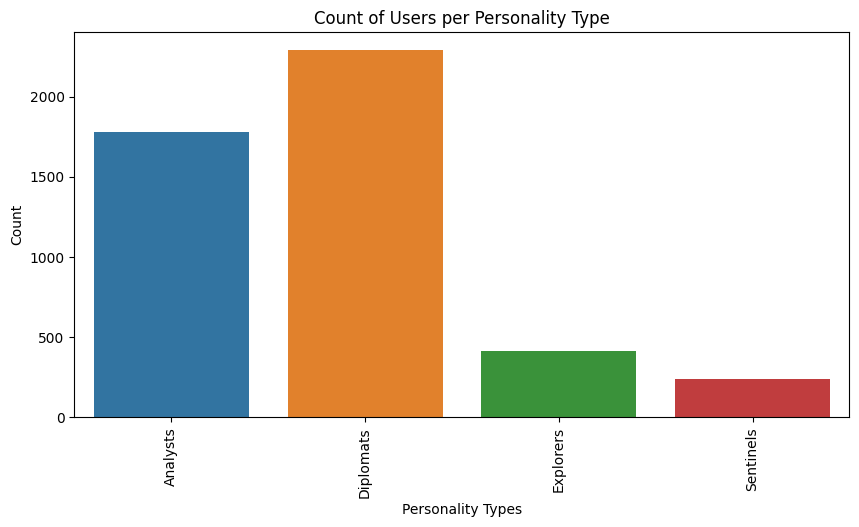

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'types' column contains personality type strings
# You can convert it into a categorical data type in pandas
df['Group'] = df['Group'].astype('category')

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Group')
plt.xlabel('Personality Types')
plt.ylabel('Count')
plt.title('Count of Users per Personality Type')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


In [14]:
#removing URLs and punctuation from dataset
for index in df.index.values:
  df.posts.iloc[index] = ' '.join(df.posts.iloc[index].split('|||'))
  df.posts.iloc[index] = re.sub(r"http\S+","",df.posts.iloc[index])
  df.posts.iloc[index] = re.sub(r"[-/@.?!_,:;()|0-9]","",df.posts.iloc[index])
  df.posts.iloc[index] = ' '.join(df.posts.iloc[index].split('  '))
df.head(10)

"""
saving the clean dataset into a csv file
df.to_csv('mbti_clean_dataset.csv',index=False)
"""

<ipython-input-14-0e08f32183a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.posts.iloc[index] = ' '.join(df.posts.iloc[index].split('|||'))
<ipython-input-14-0e08f32183a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.posts.iloc[index] = re.sub(r"http\S+","",df.posts.iloc[index])
<ipython-input-14-0e08f32183a8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.posts.iloc[index] = re.sub(r"[-/@.?!_,:;()|0-9]","",df.posts

"\nsaving the clean dataset into a csv file\ndf.to_csv('mbti_clean_dataset.csv',index=False)\n"

In [15]:
#identifying the different classes of users in the dataset
labels = df.Group.unique()
labels

['Diplomats', 'Analysts', 'Explorers', 'Sentinels']
Categories (4, object): ['Analysts', 'Diplomats', 'Explorers', 'Sentinels']

In [16]:
#mapping personality types with their numberical representation
labels2 = []
label_rep = {}
for index,labels in enumerate(labels):
    label_rep[labels] = index
    labels2.append(labels)
labels2

['Diplomats', 'Analysts', 'Explorers', 'Sentinels']

In [17]:
label_rep

{'Diplomats': 0, 'Analysts': 1, 'Explorers': 2, 'Sentinels': 3}

In [18]:
#replacing each personality type with its numerical representation

v = len(df['Group'])
df['label']=0
for r in range(v):
   if((df['Group'])[r] == 'Diplomats' ):
    (df['label'])[r]=0
   if((df['Group'])[r] == 'Analysts' ):
    (df['label'])[r]=1
   if((df['Group'])[r] == 'Explorers' ):
    (df['label'])[r]=2
   if((df['Group'])[r] == 'Sentinels' ):
    (df['label'])[r]=3
print(df)
#print(df['label'])'''
df.head(10)

<ipython-input-18-f30c85b0a7bc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (df['label'])[r]=0
<ipython-input-18-f30c85b0a7bc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (df['label'])[r]=1
<ipython-input-18-f30c85b0a7bc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (df['label'])[r]=2
<ipython-input-18-f30c85b0a7bc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

     types                                              posts      Group  \
0     INFJ  ' enfp and intj moments  sportscenter not top ...  Diplomats   
1     ENTP  'I'm finding the lack of me in these posts ver...   Analysts   
2     INTP  'Good one   Of course to which I say I know th...   Analysts   
3     INTJ  'Dear INTP  I enjoyed our conversation the oth...   Analysts   
4     ENTJ  'You're fired That's another silly misconcepti...   Analysts   
...    ...                                                ...        ...   
4711  INFP  'oh boy started this thread a while back just ...  Diplomats   
4712  ENFP  'Male INTJs in their late 's early s are likel...  Diplomats   
4713  INTP  'You aren't very interesting Major in Lesbian ...   Analysts   
4714  INFJ  Yes this is very useful and the reason for whi...  Diplomats   
4715  INFJ  'Interacting and communicating with other peop...  Diplomats   

      label  
0         0  
1         1  
2         1  
3         1  
4         1  
...

,types,posts,Group,label
0,INFJ,' enfp and intj moments sportscenter not top ...,Diplomats,0
1,ENTP,'I'm finding the lack of me in these posts ver...,Analysts,1
2,INTP,'Good one Of course to which I say I know th...,Analysts,1
3,INTJ,'Dear INTP I enjoyed our conversation the oth...,Analysts,1
4,ENTJ,'You're fired That's another silly misconcepti...,Analysts,1
5,INTJ,' Science is not perfect No scientist claims t...,Analysts,1
6,INFJ,'No I can't draw on my own nails haha Those we...,Diplomats,0
7,INTJ,'I tend to build up a collection of things on ...,Analysts,1
8,INFJ,I'm not sure that's a good question The distin...,Diplomats,0
9,INTP,' I'm in this position where I have to actuall...,Analysts,1


In [19]:
#Splitting the dataset into training (85% of the data) and test (15% of the data) sets 0.15,17
x_train, x_test, y_train, y_test = train_test_split(df.index.values, df.label.values, test_size=0.30, random_state=20, stratify=df.label.values)

In [20]:
#creating a new column "data_type"
df['data_type'] = ['not_set']*df.shape[0]

In [21]:
#identifying the rows belonging to both training and test sets
df.loc[x_train,'data_type'] = 'train'
df.loc[x_test,' data_type'] = 'test'

In [ ]:
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split

#Splitting the dataset into training (85% of the data) and test (15% of the data) sets
x_train, x_test, y_train, y_test = train_test_split(df.index.values, df.label.values, test_size=0.15, random_state=17, stratify=df.label.values)

# Creating a new column "data_type"
df['data_type'] = 'train'

# Identifying the rows belonging to both training and test sets
df.loc[x_train, 'data_type'] = 'train'
df.loc[x_test, 'data_type'] = 'test'

# Verify the data in 'data_type' column
print(df.head(10))

# Check data for training and test sets
print(df.groupby(['Group', 'label', 'data_type']).count())

# Creating a BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Encoding the data using your tokenizer with truncation and padding
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type == 'train'].posts.values.tolist(),  # Ensure it's a list
    add_special_tokens=True,
    return_attention_mask=True,
    padding='max_length',
    max_length=256,
    return_tensors='pt',
    truncation=True
)

encoded_data_test = tokenizer.batch_encode_plus(
    df[df.data_type == 'test'].posts.values.tolist(),  # Ensure it's a list
    add_special_tokens=True,
    return_attention_mask=True,
    padding='max_length',
    max_length=256,
    return_tensors='pt',
    truncation=True
)


  types                                              posts      Group  label  \
0  INFJ  ' enfp and intj moments  sportscenter not top ...  Diplomats      0   
1  ENTP  'I'm finding the lack of me in these posts ver...   Analysts      1   
2  INTP  'Good one   Of course to which I say I know th...   Analysts      1   
3  INTJ  'Dear INTP  I enjoyed our conversation the oth...   Analysts      1   
4  ENTJ  'You're fired That's another silly misconcepti...   Analysts      1   
5  INTJ  ' Science is not perfect No scientist claims t...   Analysts      1   
6  INFJ  'No I can't draw on my own nails haha Those we...  Diplomats      0   
7  INTJ  'I tend to build up a collection of things on ...   Analysts      1   
8  INFJ  I'm not sure that's a good question The distin...  Diplomats      0   
9  INTP  ' I'm in this position where I have to actuall...   Analysts      1   

  data_type  data_type  
0     train        NaN  
1     train       test  
2     train       test  
3     train        

In [ ]:
df.head(10)

,types,posts,Group,label,data_type,data_type
0,INFJ,' enfp and intj moments sportscenter not top ...,Diplomats,0,train,NaN
1,ENTP,'I'm finding the lack of me in these posts ver...,Analysts,1,train,test
2,INTP,'Good one Of course to which I say I know th...,Analysts,1,train,test
3,INTJ,'Dear INTP I enjoyed our conversation the oth...,Analysts,1,train,NaN
4,ENTJ,'You're fired That's another silly misconcepti...,Analysts,1,train,test
5,INTJ,' Science is not perfect No scientist claims t...,Analysts,1,train,test
6,INFJ,'No I can't draw on my own nails haha Those we...,Diplomats,0,test,NaN
7,INTJ,'I tend to build up a collection of things on ...,Analysts,1,train,NaN
8,INFJ,I'm not sure that's a good question The distin...,Diplomats,0,train,test
9,INTP,' I'm in this position where I have to actuall...,Analysts,1,train,NaN


In [ ]:
#showing the amount of data reserved for training and test per personality type
df.groupby(['types','label','data_type']).count()

posts  Group   data_type
types label data_type                          
ENFJ  0     test          15     15           2
            train         94     94          19
ENFP  0     test          61     61          17
            train        296    296         103
ENTJ  1     test          12     12           0
            train        101    101          30
ENTP  1     test          58     58          20
            train        330    330         102
ESFJ  3     test           1      1           1
            train         20     20           4
ESFP  2     test           4      4           2
            train         24     24           7
ESTJ  3     test           4      4           1
            train         20     20           6
ESTP  2     test          10     10           1
            train         45     45          14
INFJ  0     test         131    131          42
            train        691    691         193
INFP  0     test         136    136          37
            train        864    864         274
INTJ  1     test          96     96          20
            train        476    476         142
INTP  1     test         101    101          31
            train        606    606         189
ISFJ  3     test          12     12           4
            train         78     78          27
ISFP  2     test          21     21           8
            train        120    120          35
ISTJ  3     test          19     19           5
            train         84     84          23
ISTP  2     test          27     27           9
            train        159    159          47

In [ ]:
#creating a BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                          do_lower_case=True)

In [ ]:
'''# Encoding the data using your tokenizer with truncation and padding
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].posts.values,
    add_special_tokens=True,
    return_attention_mask=True,
    padding='max_length',  # Use padding='max_length'
    max_length=256,
    return_tensors='pt',
    truncation=True
)

encoded_data_test = tokenizer.batch_encode_plus(
    df[df.data_type=='test'].posts.values,
    add_special_tokens=True,
    return_attention_mask=True,
    padding='max_length',
    max_length=256,
    return_tensors='pt',
    truncation=True
)'''

"# Encoding the data using your tokenizer with truncation and padding\nencoded_data_train = tokenizer.batch_encode_plus(\n    df[df.data_type=='train'].posts.values,\n    add_special_tokens=True,\n    return_attention_mask=True,\n    padding='max_length',  # Use padding='max_length'\n    max_length=256,\n    return_tensors='pt',\n    truncation=True\n)\n\nencoded_data_test = tokenizer.batch_encode_plus(\n    df[df.data_type=='test'].posts.values,\n    add_special_tokens=True,\n    return_attention_mask=True,\n    padding='max_length',\n    max_length=256,\n    return_tensors='pt',\n    truncation=True\n)"

In [ ]:
#showing an example of data tokenized and encoded by BERT tokenizer
encoded_data_test

{'input_ids': tensor([[  101,  1005,  2053,  ...,  2016,  2515,   102],
        [  101,  1005,  4931,  ...,  1037, 22293,   102],
        [  101,  1005,  2053,  ...,  2424,  3374,   102],
        ...,
        [  101,  1005,  2024,  ...,  6806,  2273,   102],
        [  101,  1005,  2017,  ...,  2245,  1996,   102],
        [  101,  1005, 21935,  ...,  2017,  2438,   102]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])}

In [ ]:
#showing an example of data tokenized and encoded by BERT tokenizer
encoded_data_train

{'input_ids': tensor([[ 101, 1005, 4372,  ..., 2009, 3544,  102],
        [ 101, 1005, 1045,  ..., 2245, 1997,  102],
        [ 101, 1005, 2204,  ..., 1996, 2972,  102],
        ...,
        [ 101, 1005, 2821,  ..., 2040, 3084,  102],
        [ 101, 1005, 3287,  ..., 2387, 2242,  102],
        [ 101, 2748, 2023,  ..., 2367, 2029,  102]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])}

In [ ]:
#preparing inputs for BERT model
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
var = df[df.data_type=='train'].label.values
print(df)
labels_train = torch.tensor(var)

     types                                              posts      Group  \
0     INFJ  ' enfp and intj moments  sportscenter not top ...  Diplomats   
1     ENTP  'I'm finding the lack of me in these posts ver...   Analysts   
2     INTP  'Good one   Of course to which I say I know th...   Analysts   
3     INTJ  'Dear INTP  I enjoyed our conversation the oth...   Analysts   
4     ENTJ  'You're fired That's another silly misconcepti...   Analysts   
...    ...                                                ...        ...   
4711  INFP  'oh boy started this thread a while back just ...  Diplomats   
4712  ENFP  'Male INTJs in their late 's early s are likel...  Diplomats   
4713  INTP  'You aren't very interesting Major in Lesbian ...   Analysts   
4714  INFJ  Yes this is very useful and the reason for whi...  Diplomats   
4715  INFJ  'Interacting and communicating with other peop...  Diplomats   

      label data_type  data_type  
0         0     train        NaN  
1         1     t

In [ ]:
input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(df[df.data_type=='test'].label.values)

In [ ]:
dataset_train = TensorDataset(input_ids_train,attention_masks_train,labels_train)
dataset_test = TensorDataset(input_ids_test,attention_masks_test,labels_test)
len(dataset_train)

4008

In [ ]:
#creating a BertForSequenceClassification model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_rep),
                                                      output_attentions=False,
                                                      output_hidden_states=False)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

In [ ]:
#Defining the batch size
batch_size = 32
#less for limited hardware ressources. Example : 4

In [ ]:
#creating dataloader to load the data while training
dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)

dataloader_test = DataLoader(dataset_test,
                                   sampler=SequentialSampler(dataset_test),
                                   batch_size=batch_size)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

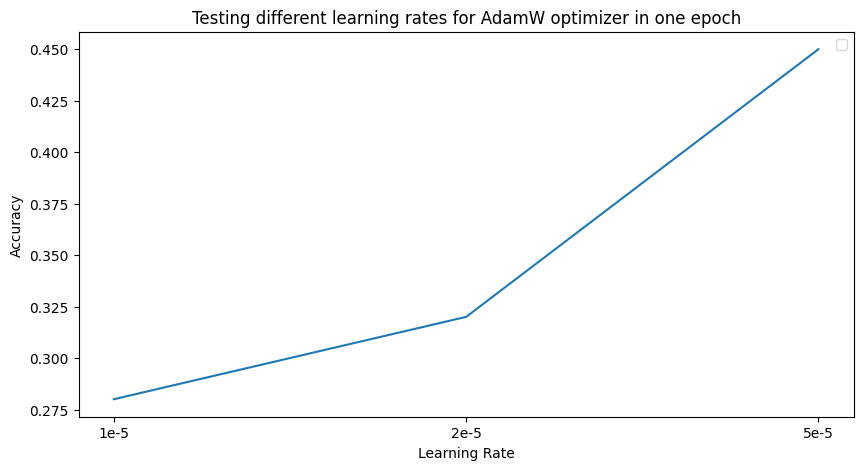

In [ ]:
"""
Testing different learning rates for AdamW optimizer in one epoch
The following values of learning rates were tested on this code
Recommanded learning rate for BERT between 2e-5 and 5e-5
"""
learning_rate = ['1e-5','2e-5','5e-5']
accuracy = [0.28,0.32,0.45]
plt.figure(figsize=(10,5))
plt.title('Testing different learning rates for AdamW optimizer in one epoch')
plt.ylabel('Accuracy')
plt.xlabel('Learning Rate')
plt.legend()
plt.plot(learning_rate,accuracy)

In [ ]:
#creating an AdamW optimizer
optimizer = AdamW(model.parameters(),
                  lr=1e-5,
                  eps=1e-8)
#recommanded epsilon : 1e-8

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
#Defining the number of epochs
epochs = 10

In [ ]:
#creating a scheduler to update the learning rate while training
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0.1,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
#Defining the global accuracy function
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [ ]:
#Defining the accuracy per class function
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_rep.items()}

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')
    return preds_flat, labels_flat

In [ ]:
#Defining the device on which we're going to run the code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [ ]:
#Defining the evaluation function to get predictions and true types
def evaluate(dataloader_test):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_test:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_test)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [ ]:

#Training

import random
seed_value = 17
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)
f1_score_history = []
f1_score_train_history = []
train_loss_history = []
train_test_history = []

for epoch in tqdm(range(1, epochs+1)):

    model.train()

    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        outputs = model(**inputs)

        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


    torch.save(model.state_dict(), f'finetuned_BERT_epoch_{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(dataloader_test)
    tr_loss, predictions_train, true_vals_train = evaluate(dataloader_train)
    val_f1 = f1_score_func(predictions, true_vals)
    tr_f1 = f1_score_func(predictions_train, true_vals_train)
    f1_score_history.append(val_f1)
    f1_score_train_history.append(tr_f1)
    tqdm.write(f'Test loss: {val_loss}')
    train_test_history.append(val_loss)
    tqdm.write(f'F1 Score test (Weighted): {val_f1}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/126 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.0847283365234497
Test loss: 1.0048262865647026
F1 Score test (Weighted): 0.5514670185226506


Epoch 2:   0%|          | 0/126 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.9263643754853143
Test loss: 0.8868909659593002
F1 Score test (Weighted): 0.6128467205253526


Epoch 3:   0%|          | 0/126 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.8223316891798897
Test loss: 0.8613704235657401
F1 Score test (Weighted): 0.6293354692021497


Epoch 4:   0%|          | 0/126 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.7319920384694659
Test loss: 0.8434184556422026
F1 Score test (Weighted): 0.6547440689307055


Epoch 5:   0%|          | 0/126 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.6339416035584041
Test loss: 0.8379009936166846
F1 Score test (Weighted): 0.6606422256398238


Epoch 6:   0%|          | 0/126 [00:00<?, ?it/s]


Epoch 6
Training loss: 0.5652968521629061
Test loss: 0.8800775641980378
F1 Score test (Weighted): 0.6559184381387467


Epoch 7:   0%|          | 0/126 [00:00<?, ?it/s]


Epoch 7
Training loss: 0.5075414909256829
Test loss: 0.8653126346028369
F1 Score test (Weighted): 0.657126498773556


Epoch 8:   0%|          | 0/126 [00:00<?, ?it/s]


Epoch 8
Training loss: 0.46079837436240817
Test loss: 0.8908328550017398
F1 Score test (Weighted): 0.64364601135935


Epoch 9:   0%|          | 0/126 [00:00<?, ?it/s]


Epoch 9
Training loss: 0.4212005613815217
Test loss: 0.8969872762327609
F1 Score test (Weighted): 0.656988488999068


Epoch 10:   0%|          | 0/126 [00:00<?, ?it/s]


Epoch 10
Training loss: 0.4027790305396867
Test loss: 0.8988631678664166
F1 Score test (Weighted): 0.6499023615519648


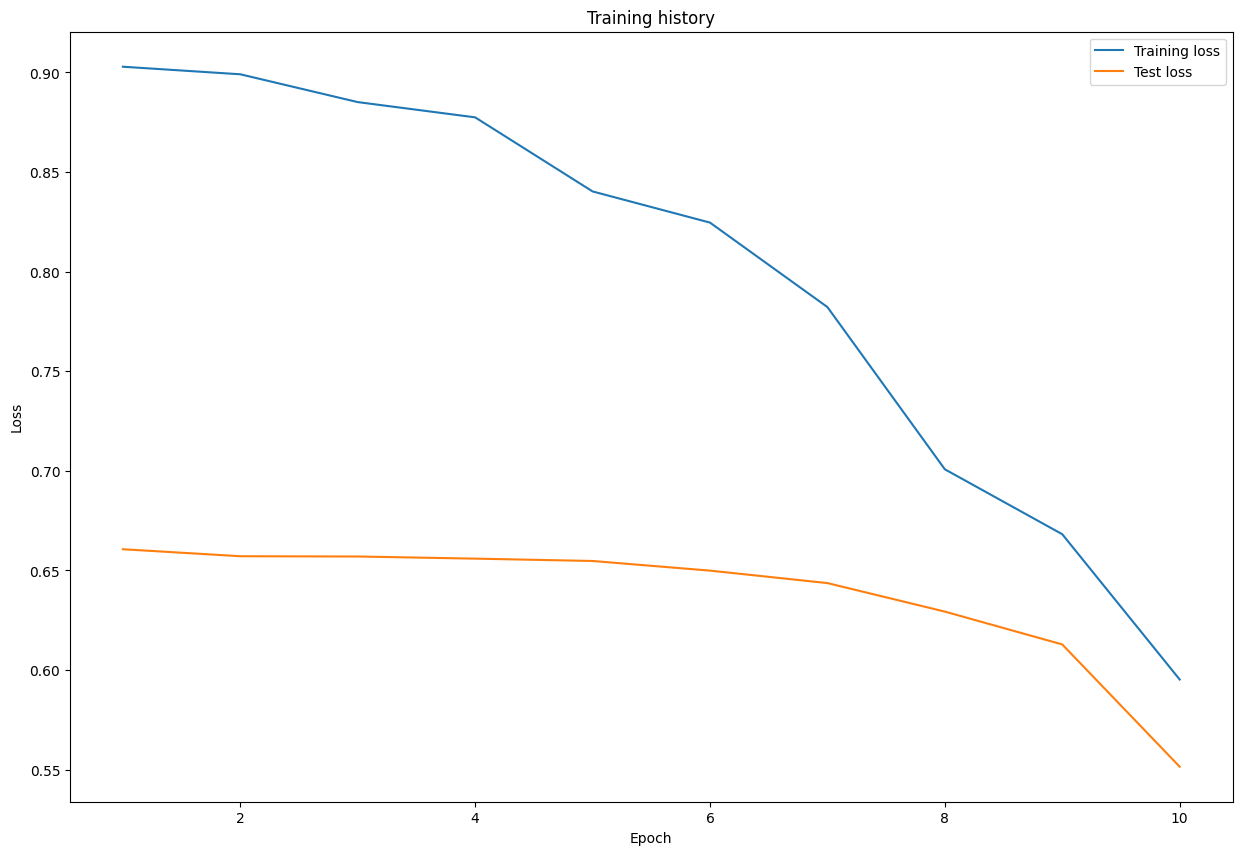

In [ ]:
import matplotlib.pyplot as plt

# Sort the training loss history in decreasing order
f1_score_train_history_sorted = sorted(f1_score_train_history, reverse=True)

# Create a new list of epochs, starting from 1 and increasing by 1, the same length as the sorted training loss history
epochs = list(range(1, len(f1_score_train_history_sorted) + 1))

# Plot the sorted training loss history against the new list of epochs
plt.figure(figsize=(15,10))
plt.plot(epochs, f1_score_train_history_sorted, label='Training loss')

# Sort the test loss history in decreasing order
f1_score_history_sorted = sorted(f1_score_history, reverse=True)

# Plot the sorted test loss history against the new list of epochs
plt.plot(epochs, f1_score_history_sorted, label='Test loss')

plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 0:   0%|          | 0/126 [00:00<?, ?it/s]


Epoch 0
Training loss: 0.37872158945907675
Test loss: 0.9876329225042592
F1 Score test (Weighted): 0.6535766638344809


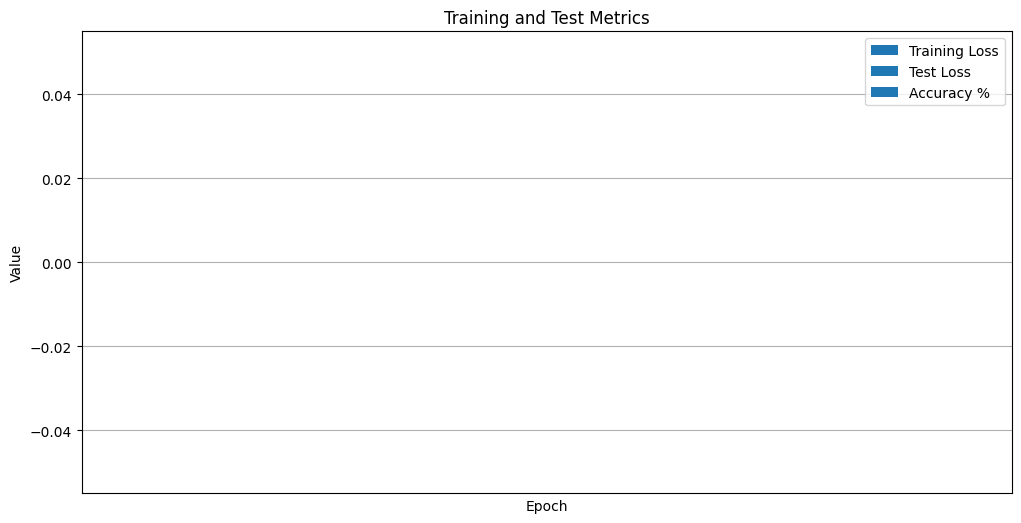

In [ ]:
import random
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# ... (your other import statements)

# Initialize lists to store F1 scores
f1_score_history = []
f1_score_train_history = []
train_loss_history = []
train_test_history = []

# ... (the rest of your code)

# Lists to store the training and test losses, as well as accuracy
# train_loss_history = []
# train_test_history = []
# accuracy_history = []

for epoch in tqdm(range(0,1)):

    model.train()

    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()

        batch = tuple(b.to(device) for b in batch)

        inputs = {
            'input_ids': batch[0],
            'attention_mask': batch[1],
            'labels': batch[2],
        }

        outputs = model(**inputs)

        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item() / len(batch))})

    torch.save(model.state_dict(), f'finetuned_BERT_epoch_{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total / len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(dataloader_test)
    tr_loss, predictions_train, true_vals_train = evaluate(dataloader_train)
    val_f1 = f1_score_func(predictions, true_vals)
    tr_f1 = f1_score_func(predictions_train, true_vals_train)
    f1_score_history.append(val_f1)
    f1_score_train_history.append(tr_f1)
    tqdm.write(f'Test loss: {val_loss}')
    train_test_history.append(val_loss)
    tqdm.write(f'F1 Score test (Weighted): {val_f1}')

# Plotting the Training Loss, Test Loss, and Accuracy with different colors and percentage values
plt.figure(figsize=(12, 6))

# Bar positions
epochs = range(0,1)

# Bar widths
width = 0.25

plt.bar([e - width for e in epochs], train_loss_history, width=width, label='Training Loss', color='b')
plt.bar(epochs, train_test_history, width=width, label='Test Loss', color='g')
plt.bar([e + width for e in epochs], f1_score_history, width=width, label='Accuracy %', color='r')

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training and Test Metrics')
plt.legend()
plt.grid(True)

# Set the x-axis labels to be the epoch numbers
plt.xticks(epochs, labels=[str(e) for e in epochs])

# Annotate the bars with percentage values
for e, train_loss, test_loss, accuracy in zip(epochs, train_loss_history, train_test_history, f1_score_history):
    plt.text(e - width, train_loss, f'{train_loss:.2f}%', ha='center', va='bottom')
    plt.text(e, test_loss, f'{test_loss:.2f}%', ha='center', va='bottom')
    plt.text(e + width, accuracy, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.show()


In [ ]:
#creating a BertForSequenceClassification model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_rep),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
#Loading the model we saved in a file
modelToBeUsed = '/content/drive/MyDrive/Capston/TEST/Train/finetuned_BERT_epoch_10.model'
model.load_state_dict(torch.load(modelToBeUsed, map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
#Getting the predictions and the types of the users in the test set
_, predictions, true_vals = evaluate(dataloader_test)

In [ ]:
#Getting the accuracy per class of each personality type
y_preds, y_true = accuracy_per_class(predictions, true_vals)

Class: Diplomats
Accuracy: 244/343

Class: Analysts
Accuracy: 197/267

Class: Explorers
Accuracy: 17/62

Class: Sentinels
Accuracy: 7/36



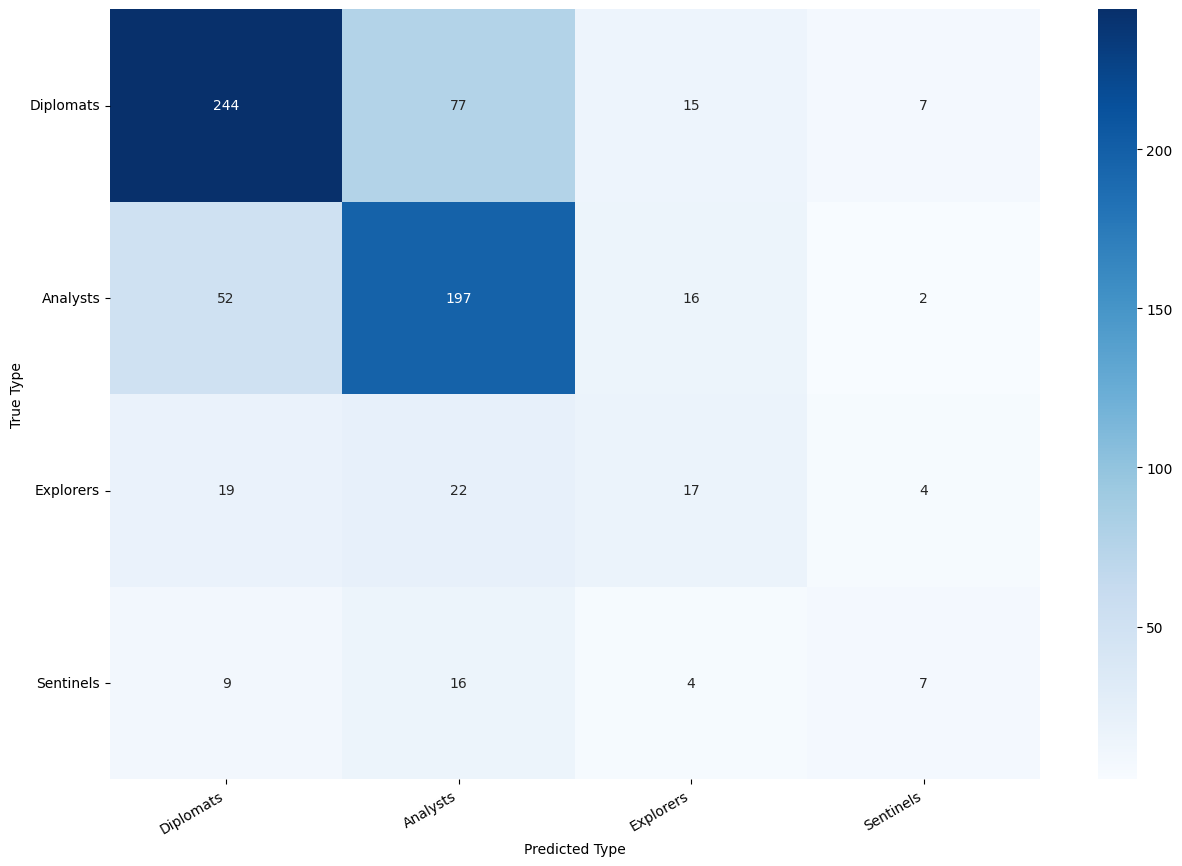

In [ ]:
#Plotting the confusion matrix in order to identifiy the misclassified types
from sklearn import metrics
import seaborn as sns
def show_confusion_matrix(confusion_matrix):
  plt.figure(figsize=(15,10))
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True Type')
  plt.xlabel('Predicted Type');

cm = metrics.confusion_matrix(y_true, y_preds)
df_cm = pd.DataFrame(cm, index=labels2, columns=labels2)
show_confusion_matrix(df_cm)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_true, y_preds)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.66


In [ ]:
"""
In the next step, we're going to try to understand the reason why certain personality types are being misclassified.
We're gonna use INFP and INFJ personality types as an example.
We're going to identify the vocabulary used in commun between these two types and calculate its percentage
"""


"\nIn the next step, we're going to try to understand the reason why certain personality types are being misclassified.\nWe're gonna use INFP and INFJ personality types as an example.\nWe're going to identify the vocabulary used in commun between these two types and calculate its percentage\n"

In [ ]:
Diplomats = df[df.Group=='Diplomats'].posts.values

Analysts = df[df.Group=='Analysts'].posts.values

Explorers = df[df.Group=='Explorers'].posts.values

Sentinels = df[df.Group=='Sentinels'].posts.values

In [ ]:
#infj = df[df.types=='INFJ'].posts.values


In [ ]:
Diplomats_tokens = []
for post in Diplomats:
  tokens = tokenizer.tokenize(post)
  Diplomats_tokens = Diplomats_tokens + tokens
Diplomats_tokens = list(set(Diplomats_tokens))
len(Diplomats_tokens)

21875

In [ ]:
print(Diplomats_tokens)

['hallways', '##ored', 'stitch', 'consumed', 'drive', 'gone', 'succession', '##ape', 'journals', 'pictured', '##ock', 'origin', 'futsal', 'strawberry', 'braid', 'brows', 'cubs', 'honoured', 'assurance', 'generic', 'patriarch', 'broad', '##cola', 'buy', '##hh', 'hades', 'apocalyptic', 'loch', 'risen', 'bonding', 'lagoon', 'trademark', 'clothing', 'yard', 'precisely', '##ub', '##rag', '##ers', 'breathing', 'diary', 'career', 'preached', 'circa', 'jeremiah', '##cco', 'scripts', 'excerpts', 'record', 'rb', 'scouts', 'jacket', '##ptive', 'brace', 'syllables', 'assimilation', 'perceive', 'equality', 'deposed', 'cafe', 'flicking', 'psychological', 'dust', 'locked', 'buyers', 'silent', '##lan', 'world', '##tower', 'pussy', 'virginia', 'dani', 'sami', 'digitally', 'darts', 'irene', 'reflected', 'billions', 'dew', 'ace', 'movement', 'sailing', 'daniels', 'hired', 'shang', 'prosperity', 'includes', '”', 'genetics', 'www', 'papers', 'relativity', 'augustus', 'timeline', 'nero', 'arise', 'visits', 

In [ ]:
Analysts_tokens = []
for post in Analysts:
  tokens = tokenizer.tokenize(post)
  Analysts_tokens = Analysts_tokens + tokens
Analysts_tokens = list(set(Analysts_tokens))
len(Analysts_tokens)

21466

In [ ]:
print(Analysts_tokens)

['hallways', '##ored', 'stitch', 'consumed', 'drive', 'gone', 'succession', '##ape', 'journals', 'pictured', '##ock', 'origin', 'strawberry', 'braid', 'brows', 'honoured', 'assurance', 'generic', 'patriarch', 'broad', '##cola', 'buy', '##hh', 'hades', 'apocalyptic', 'loch', 'risen', 'bonding', 'lagoon', 'trademark', 'clothing', 'yard', 'precisely', '##ub', '##rag', '##ers', 'breathing', 'diary', 'career', 'preached', 'circa', '##cco', 'jeremiah', 'scripts', 'surpassing', 'excerpts', 'record', 'rb', 'scouts', 'jacket', 'revoked', 'entourage', '##ptive', 'brace', 'syllables', 'assimilation', 'perceive', 'equality', 'cafe', 'psychological', 'dust', 'locked', 'buyers', 'silent', '##lan', 'world', '##tower', 'pussy', 'virginia', 'dani', 'sami', 'digitally', 'darts', 'irene', 'reflected', 'astor', 'billions', 'dew', 'ace', 'movement', 'sailing', 'daniels', 'moffat', 'hired', 'prosperity', 'includes', '”', 'genetics', 'www', 'relativity', 'papers', 'augustus', 'timeline', 'suffix', 'arise', '

In [ ]:
Explorers_tokens = []
for post in Explorers:
  tokens = tokenizer.tokenize(post)
  Explorers_tokens = Explorers_tokens + tokens
Explorers_tokens = list(set(Explorers_tokens))
len(Explorers_tokens)

15482

In [ ]:
print(Explorers_tokens)

['upstate', 'lie', 'metallic', 'blair', 'taxes', 'humiliating', '##ored', 'dwyer', 'ghosts', 'depends', 'ears', 'sloppy', 'drive', 'consume', 'gone', '##stick', 'consumed', 'urine', 'lucas', 'let', '##ivate', 'addicted', '##ape', 'journals', 'feet', 'pictured', 'instantly', 'geometry', 'abroad', 'origin', '##ock', 'shut', '##hin', 'journey', 'sexuality', 'strawberry', '##ike', 'brows', 'cubs', 'canada', 'beard', 'loans', 'whoa', 'patting', 'airlines', 'prescription', 'fooled', 'stalking', 'assurance', 'belong', 'tire', 'patriarch', 'generic', 'aside', 'pew', 'interstate', 'broad', 'pull', 'son', 'credibility', '##cola', 'buy', '##hh', 'csi', 'seem', 'james', 'apocalyptic', 'risen', 'bonding', 'coin', 'meal', 'nearest', 'lagoon', 'argue', 'captain', 'principle', 'clothing', 'objections', 'teachers', '##lom', 'explanation', 'roommate', 'impairment', '##ive', 'yard', 'okay', 'shaky', 'phil', 'precisely', 'stunned', 'maintenance', 'like', '##ub', 'alphabet', '##holding', '##rag', '##ers', 

In [ ]:
Sentinels_tokens = []
for post in Sentinels:
  tokens = tokenizer.tokenize(post)
  Sentinels_tokens = Sentinels_tokens + tokens
Sentinels_tokens = list(set(Sentinels_tokens))
len(Sentinels_tokens)

12957

In [ ]:
print(Sentinels_tokens)

['hallways', 'lie', 'metallic', 'blair', 'taxes', 'depends', 'ears', 'sloppy', 'drive', 'gone', 'hierarchical', 'servant', 'urine', '##dt', '##kled', 'let', '##ivate', 'addicted', '##ape', 'wreath', 'feet', '##yde', '##makers', 'pictured', 'instantly', 'geometry', 'abroad', 'origin', '##ock', 'shut', '##rgh', '##hin', 'journey', 'mack', 'sexuality', '##ike', 'braid', 'brows', 'canada', 'whoa', 'fooled', 'prescription', 'stalking', 'assurance', 'belong', 'generic', 'aside', 'broad', 'pull', 'son', 'credibility', 'buy', '##hh', 'csi', 'hades', 'seem', 'james', 'risen', 'coin', 'meal', 'hoc', 'argue', 'captain', 'principle', 'clothing', 'teachers', 'vance', 'explanation', 'roommate', '##ive', 'yard', 'okay', 'phil', 'glasgow', 'shaky', 'precisely', 'maintenance', 'like', '##ub', 'alphabet', '##rag', '##ers', 'breathing', 'concluding', 'linguistic', 'inappropriate', 'jeans', 'career', 'experiment', 'diary', '##cco', 'ut', 'tattoos', '##lating', 'happening', 'scripts', 'institutions', 'step

In [ ]:
#pip install matplotlib wordcloud


In [ ]:
'''from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Your code for tokenization here...

# Join the tokens into a single string
text = " ".join(entp_tokens)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for entp_tokens')
plt.show()
'''

'from wordcloud import WordCloud\nimport matplotlib.pyplot as plt\n\n# Your code for tokenization here...\n\n# Join the tokens into a single string\ntext = " ".join(entp_tokens)\n\n# Create a word cloud\nwordcloud = WordCloud(width=800, height=400, background_color=\'white\').generate(text)\n\n# Display the word cloud\nplt.figure(figsize=(10, 6))\nplt.imshow(wordcloud, interpolation=\'bilinear\')\nplt.axis("off")\nplt.title(\'Word Cloud for entp_tokens\')\nplt.show()\n'

In [ ]:
#print(entp_tokens)

In [ ]:
'''intj_tokens = []
for post in intj:
  tokens = tokenizer.tokenize(post)
  intj_tokens = intj_tokens + tokens
intj_tokens = list(set(intj_tokens))
len(intj_tokens)'''

'intj_tokens = []\nfor post in intj:\n  tokens = tokenizer.tokenize(post)\n  intj_tokens = intj_tokens + tokens\nintj_tokens = list(set(intj_tokens))\nlen(intj_tokens)'

In [ ]:
#print(intj_tokens)

In [ ]:
def intersection(lst1, lst2, lst3, lst4):
    common_elements = set(lst1) & set(lst2) & set(lst3) & set(lst4)
    lst5=[value for value in lst1 if value in common_elements]
    return lst5

In [ ]:
'''def intersection(lst4, lst5):
    lst6 = [value for value in lst4 if value in lst5]
    return lst6'''

'def intersection(lst4, lst5):\n    lst6 = [value for value in lst4 if value in lst5]\n    return lst6'

In [ ]:
inter= intersection(Explorers_tokens,Analysts_tokens,Diplomats_tokens,Sentinels_tokens)

In [ ]:
len(inter)/len(Explorers_tokens)*100

70.43663609352797

In [ ]:
len(inter)/len(Analysts_tokens)*100

50.801267120096895

In [ ]:
len(inter)/len(Diplomats_tokens)*100

49.85142857142857

In [ ]:
len(inter)/len(Sentinels_tokens)*100

84.16300069460523

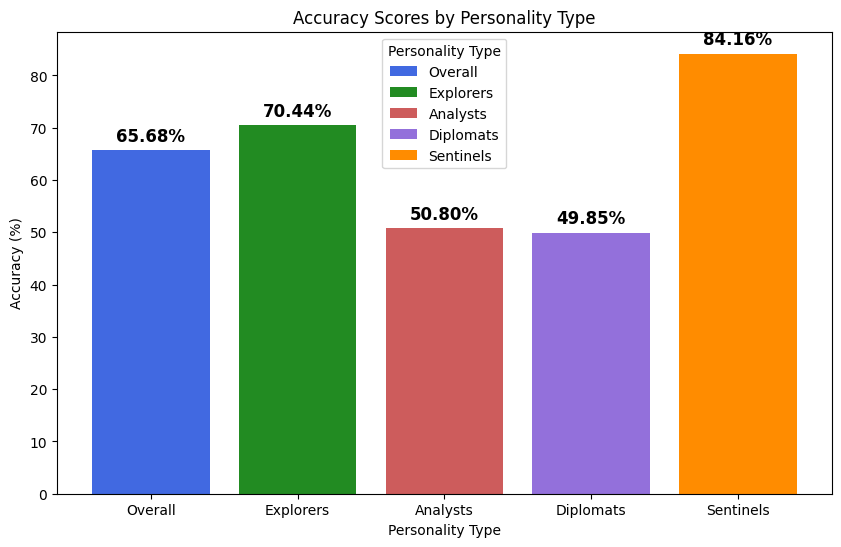

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Individual accuracy scores
individual_accuracies = [len(inter) / len(Explorers_tokens) * 100,
                        len(inter) / len(Analysts_tokens) * 100,
                        len(inter) / len(Diplomats_tokens) * 100,
                        len(inter) / len(Sentinels_tokens) * 100]

# Overall accuracy
overall_accuracy = accuracy * 100

# Labels for the bars
labels = ['Overall'] + ['Explorers', 'Analysts', 'Diplomats', 'Sentinels']

# Values for the bars
accuracy_values = [overall_accuracy] + individual_accuracies

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracy_values, color=['royalblue', 'forestgreen', 'indianred', 'mediumpurple', 'darkorange'])
plt.title('Accuracy Scores by Personality Type')
plt.xlabel('Personality Type')
plt.ylabel('Accuracy (%)')

# Add values on top of the bars
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Add labels to the bars
for bar, label in zip(bars, labels):
    bar.set_label(label)

# Add descriptions
descriptions = [
    "Overall accuracy across all personality types",
    "Accuracy for Explorers personality type",
    "Accuracy for Analysts personality type",
    "Accuracy for Diplomats personality type",
    "Accuracy for Sentinels personality type"
]

for i, description in enumerate(descriptions):
    plt.annotate(description, (i, -10), xycoords='data', textcoords='data',
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))

# Adjust legend and colors
plt.legend(loc='upper right')
plt.legend(title="Personality Type")

plt.show()
